In [143]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
DIR = './data/'

In [144]:
def get_data(directories,years): 
    return pd.concat(
        map(lambda x: pd.read_csv(
            f'{directories}yob{x}.txt',
            header=None,
            names=['Name','Gender','Quantity']
        ).assign(Year=x),
            years)
    ).reset_index(drop=True)

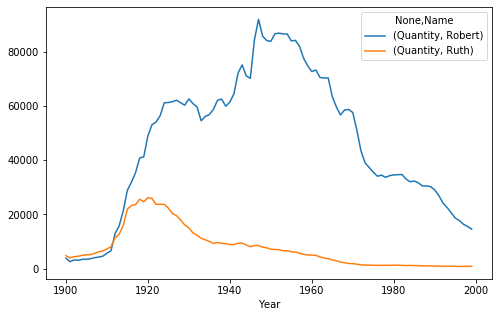

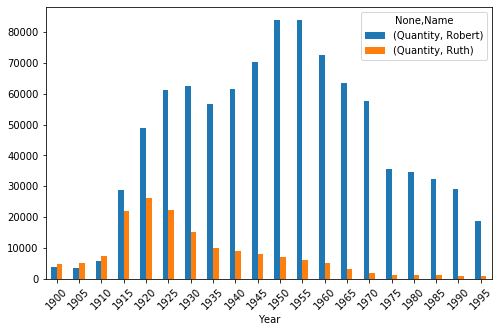

In [145]:
df = get_data(DIR,range(1900,2000))
name_dinamics = df[(df['Name'] == 'Ruth') | (df['Name'] == 'Robert')].groupby(['Name','Year']).sum().unstack('Name')
name_dinamics.plot()
name_dinamics.filter(regex='0$|5$',axis=0).plot(kind='bar', rot=45)